# Exercise Sheet 2
## Exercise 4: Gibbs sampling

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
import h5py as h5

###################################################################################################
# don't worry if you have not used python extensively before and if this is confusing
# it's only required for the nice progress bar
# if you want to see the progress bar on your computer you need to first run conda install tqdm
# (https://github.com/tqdm/tqdm)
try:
    # try to import functions from TQDM
    from tqdm import tqdm_notebook as tqdm
    from tqdm import tnrange
except ModuleNotFoundError:
    # if TQDM is not installed this fallback code will run.
    # it just defines dummy functions that map back to vanilla python
    # *args and *kwargs are "catch-all" arguments, see e.g. http://thepythonguru.com/python-args-and-kwargs/
    def tqdm(x, *args, **kwargs):
        return x
    def tnrange(a, *args, **kwargs):
        return range(a)
###################################################################################################

In [38]:
def prior_l0(n_states):
    # TODO create an array that represents the first prior
    return np.zeros([n_states, n_states], dtype=int)

def prior_l1(n_states):
    # TODO create an array that represents the second prior
    return np.zeros([n_states, n_states], dtype=int)

In [27]:
def calc_proba(lattice, x, y, pairwise, unary=None):
    states = []
    # TODO fill states with probabilities for all possible n_states at position x, y
    # TODO use unary=None in part a) to sample only from the prior. Integrate the unaries in the probabilities for part b)
    return states

In [28]:
def gibbs_update(lattice, x, y, pairwise, unary=None):
    # TODO choose new state
    lattice[x,y] = new_state

In [36]:
def sweep_scanlines(lattice, pairwise, unary=None):
    # TODO: itererate over lattice and update all nodes
    for element in np.nditer(lattice):
        pass
 
def sweep_scanlines_rnd(lattice, pairwise, unary=None):
    # TODO: itererate over lattice in random order and update all nodes    
    pass

### a) Sampling from the prior

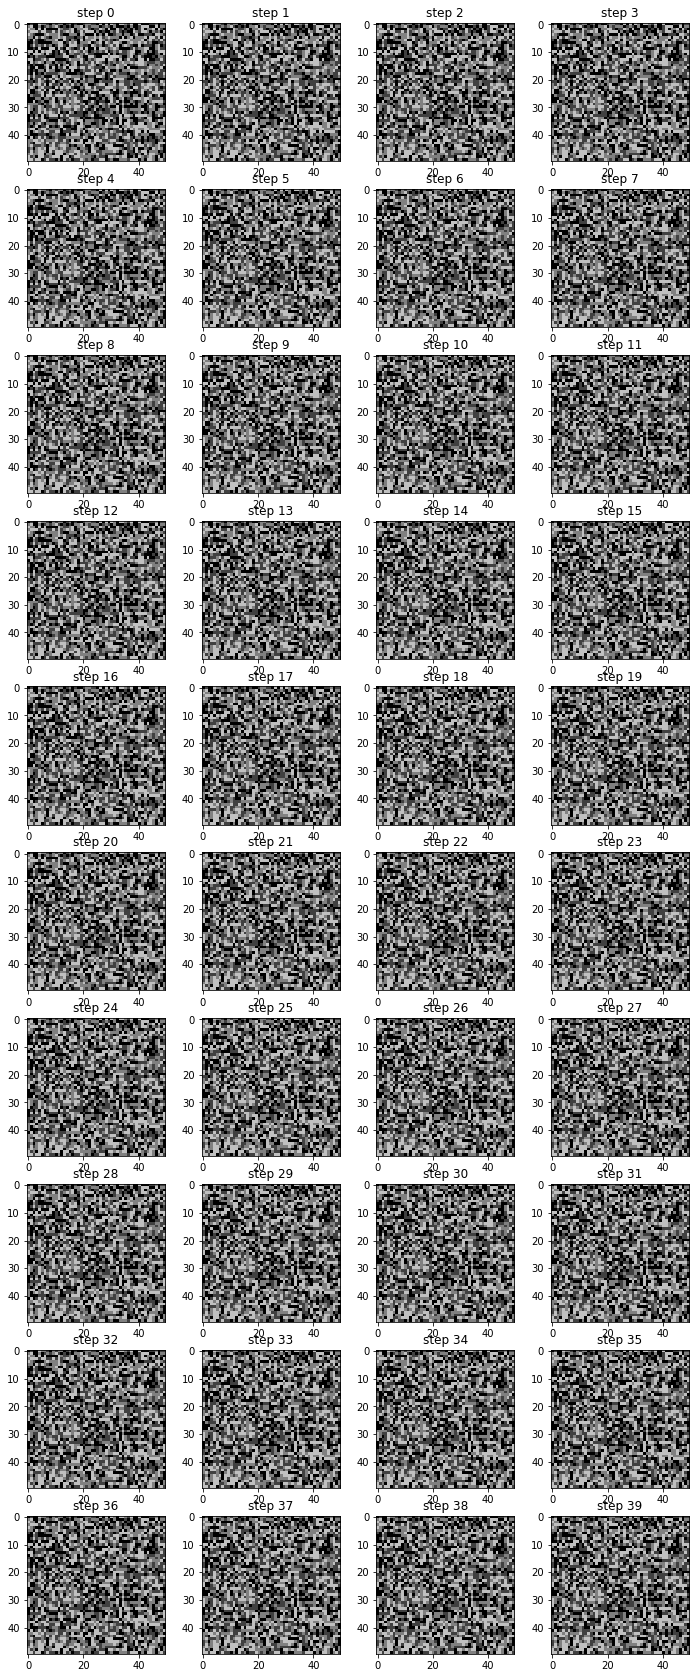

In [37]:
# you can change these values if you like 
n_steps_x = 10
n_steps_y = 4
n_states = 4
n_x = 50
n_y = 50
alpha = 2

# TODO: setup lattice to random integers between 0 and n_states with shape (n_x, n_y)
lattice = np.random.randint(0, n_states, size=(n_x, n_y))

# TODO: call function to setup prior to be a (n_states,n_states) array
prior = prior_l0(n_states)

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for _ in range(10):
        sweep_scanlines(lattice, prior)
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)

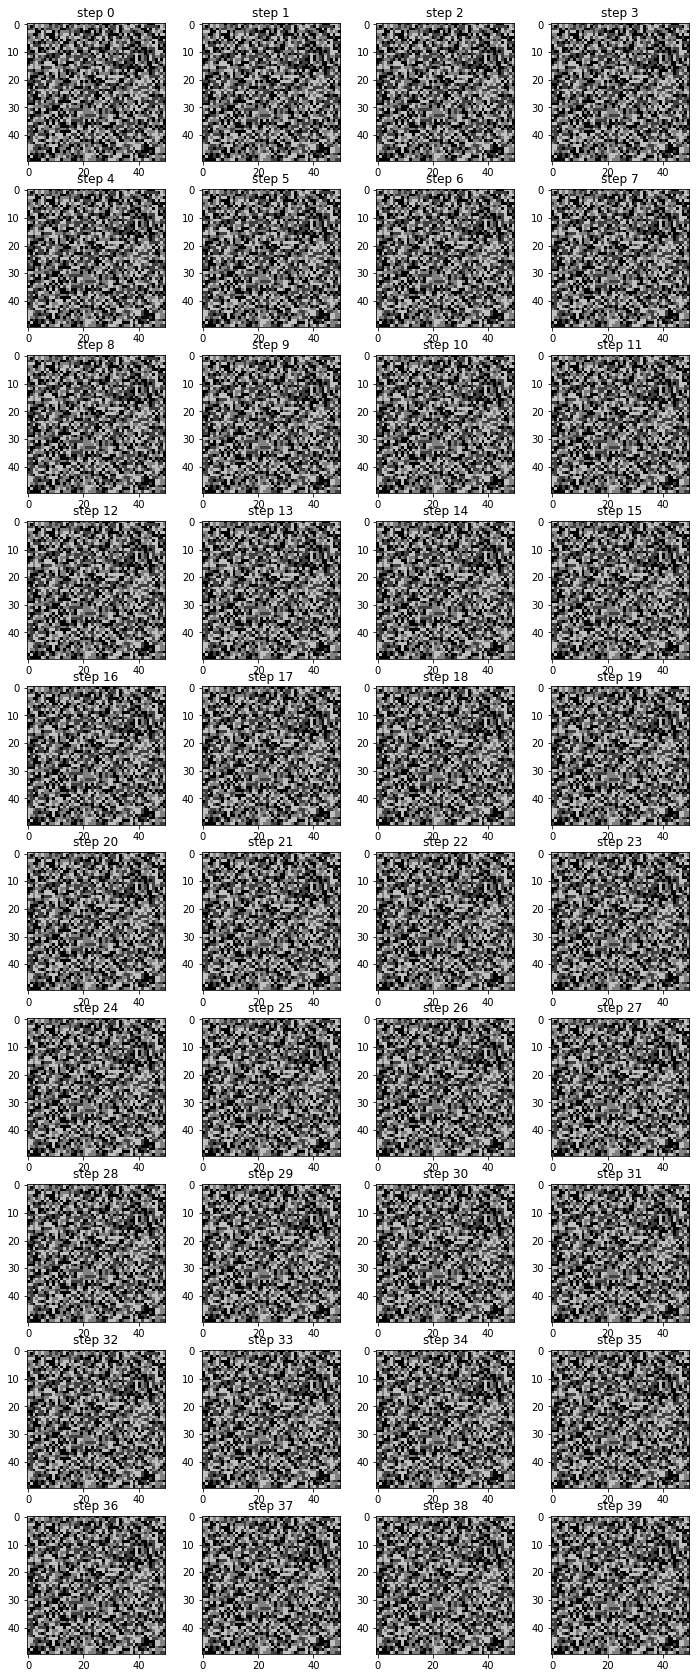

In [39]:
# TODO sample from the second prior

n_steps_x = 10
n_steps_y = 4
n_states = 4
n_x = 50
n_y = 50
alpha = 2

lattice = np.random.randint(0, n_states, size=(n_x, n_y))

prior = prior_l1(n_states)

f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i in tnrange(n_steps_x*n_steps_y):
    for _ in range(10):
        sweep_scanlines_rnd(lattice, prior)
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    ax.set_title("step "+str(i))
    ax.imshow(lattice, cmap='gray', vmax=n_states)

### b) Sampling from the posterior

In [84]:
# TODO load the predictions for the test image in pred
import h5py
def load_predictions(path=''):
    pred = h5py.File('C:\\Users\\Sebastian\\Desktop\\predictions.h5', 'r')
    if pred != None:
        return pred

#### Prior 1)

In [86]:
n_steps_x = 4
n_steps_y = 2
n_states = 5
alpha = 2

pred = load_predictions()
keys = list(pred.keys())

test = np.array(pred[keys[1]])


for key in range(1):
    print(pred[keys[0]][i])


# TODO: setup lattice to the classes with the highes probabilities according to pred

# TODO: call function to setup prior to be a (n_states,n_states) array


unary = pred

samples = []


for i in tnrange(n_steps_x*n_steps_y, desc='outer', position=0):
    # TODO update all nodes in random order
    samples.append(lattice.copy())




[[1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 ...
 [0.7 0.  0.  0.  0.3]
 [0.8 0.  0.  0.  0.2]
 [0.9 0.  0.  0.  0.1]]


In [ ]:
f = plt.figure()
f.set_size_inches((n_steps_y*3, n_steps_x*3))
for i, sample in enumerate(samples):
    ax = f.add_subplot(n_steps_x, n_steps_y, i+1)
    
    # TODO plot the samples

In [3]:
# TODO compute the mean posterior and plot it

#### Prior 2)

In [4]:
# TODO do the same for prior 2)

### $\star$ Gibbs sampling on a chessboard

In [ ]:
# TODO implement the Gibbs sampler to do the updates parallel for all "black fields" and afterwards all "white fields"
# Hints (for one possible solution:
# * convert the class labels into one-hot vectors of length n_states
# * use masks to get all black fields, all white fields and all corresponding neighboring fields (you will have to extend the lattice on each side by a row/column of zero-vectors to avoid edge effects)
# * to compute the class probabilities: first sum over the one-hot vectors of the neighboring nodes. then use matrix multiplication with the prior matrix
# * to sample from multiple probability vectors at the same time you can use a reparametrization trick: sampling from a discrete distribution with probabilities (p_1,...,p_N) is equivalent to sampling (U_1,...,U_N) from a uniform distribution Uni(0,1) and then computeing the state as argmax_i(log(p_i)-log(-log(U_i)))